In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import math
PI = math.pi
TAU = math.pi*2

In [3]:
from manim import *
fig8_1 = Circle(radius=40, color=GREY)
fig8_2 = Circle(radius=40, color=GREY)
fig8_1.rotate(PI*2)
fig8_1.move_to(UP)
fig8_2.move_to(DOWN)
fig8 = Group(fig8_1, fig8_2)

figinf_1 = Circle(radius=40, color=GREY)
figinf_2 = Circle(radius=40, color=GREY)
figinf_1.move_to(RIGHT)
figinf_2.move_to(LEFT)
figinf = Group(figinf_1, figinf_2)
        
circle = Circle(radius=80, color=GREY)

def circlephase(phase):
    return circle.point_at_angle(-phase)[:2]

def fig8phase(phase):
    if phase <= PI:
        return fig8_1.point_at_angle(3/2*PI - 2*phase)[:2]
    else:
        return fig8_2.point_at_angle(-3/2*PI + 2*phase)[:2]

def figinfphase(phase):
    if phase <= PI:
        return figinf_1.point_at_angle(PI - 2*phase)[:2]
    else:
        return figinf_2.point_at_angle(2*phase)[:2]

Manim Community v0.18.0.post0

In [4]:
def constrain_to_pi(angle):
    while angle > PI:
        angle -= TAU
    while angle < -PI:
        angle += TAU
    return angle

In [5]:
reverse = pd.read_csv('reverse.csv')
reverse

,x,y,phase
0,79.487,-9.043,0.018031
1,79.367,-10.036,0.020020
2,79.236,-11.028,0.022010
3,79.092,-12.017,0.023999
4,78.935,-13.005,0.025989
...,...,...,...
519,43.054,67.426,0.840443
520,42.207,67.959,0.838454
521,41.355,68.481,0.836464
522,40.495,68.993,0.834475


In [6]:
x_offset = 80 - reverse['x'].max()
y_offset = -80 - reverse['y'].min()
reverse['x'] = reverse['x'] + x_offset
reverse['y'] = reverse['y'] + y_offset

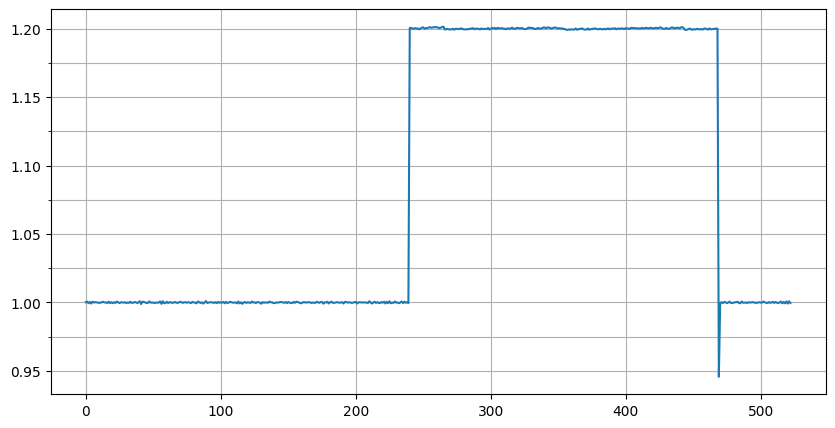

In [7]:
v = []
for i in range(reverse.shape[0]-1):
    prev = reverse.iloc[i]
    curr = reverse.iloc[i+1]
    v.append(np.sqrt((prev['x']-curr['x'])**2 + (prev['y']-curr['y'])**2))

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
ax.set_yticks(np.arange(0.9, 1.5, 0.05))
ax.set_yticks(np.arange(0.9, 1.5, 0.025), minor=True)
ax.grid(visible=True, which='both')
ax.plot(v)

In [8]:
# plt.figure(figsize=(10,10))
# plt.scatter(reverse['x'], reverse['y'], s=.5)
# plt.gca().set_aspect('equal')
# plt.grid()
# plt.show()

In [9]:
initial = reverse.iloc[0]
phase = initial['phase'] * TAU

locs = []

# omega = v/r
onPath = True
rev = 1
v_angle = -PI/2 - phase

# max_delta_angle =  1.025/10
max_delta_angle =  0.105

deg = 180/PI

for i in range(reverse.shape[0]):
    
    # reverse event
    if i == 240:
        onPath = False
        phase -= PI/5
        rev = -1
    
    phase += 1.0/80 * rev
    
    target = circlephase(phase)

    if onPath:
        locs.append(target)
        v_angle = -PI/2 - phase

    if not onPath:
        target = circlephase(phase)
        curr_loc = locs[-1]
        delta_x = target[0] - curr_loc[0]
        delta_y = target[1] - curr_loc[1]
        angle = math.atan2(delta_y, delta_x)
        angle_diff = constrain_to_pi(angle - v_angle)
        
        if abs(angle_diff) < max_delta_angle:
            v_angle += np.sign(angle_diff) * angle_diff
        else:
            v_angle += np.sign(angle_diff) * max_delta_angle
        v_angle = constrain_to_pi(v_angle)
        v = 1.2 # speed off the Path
        locs.append([curr_loc[0] + v*math.cos(v_angle), curr_loc[1] + v*math.sin(v_angle)])
    
        dist_squared = (target[0] - curr_loc[0])**2 + (target[1] - curr_loc[1])
        # if dist_squared < 1.75 and abs(angle_diff) < 0.0153:
        if dist_squared < 1:
            print(angle_diff)
            onPath = True

predicted = pd.DataFrame(locs)
predicted = predicted.rename(columns={0:'x',1:'y'})

0.015236687324150289


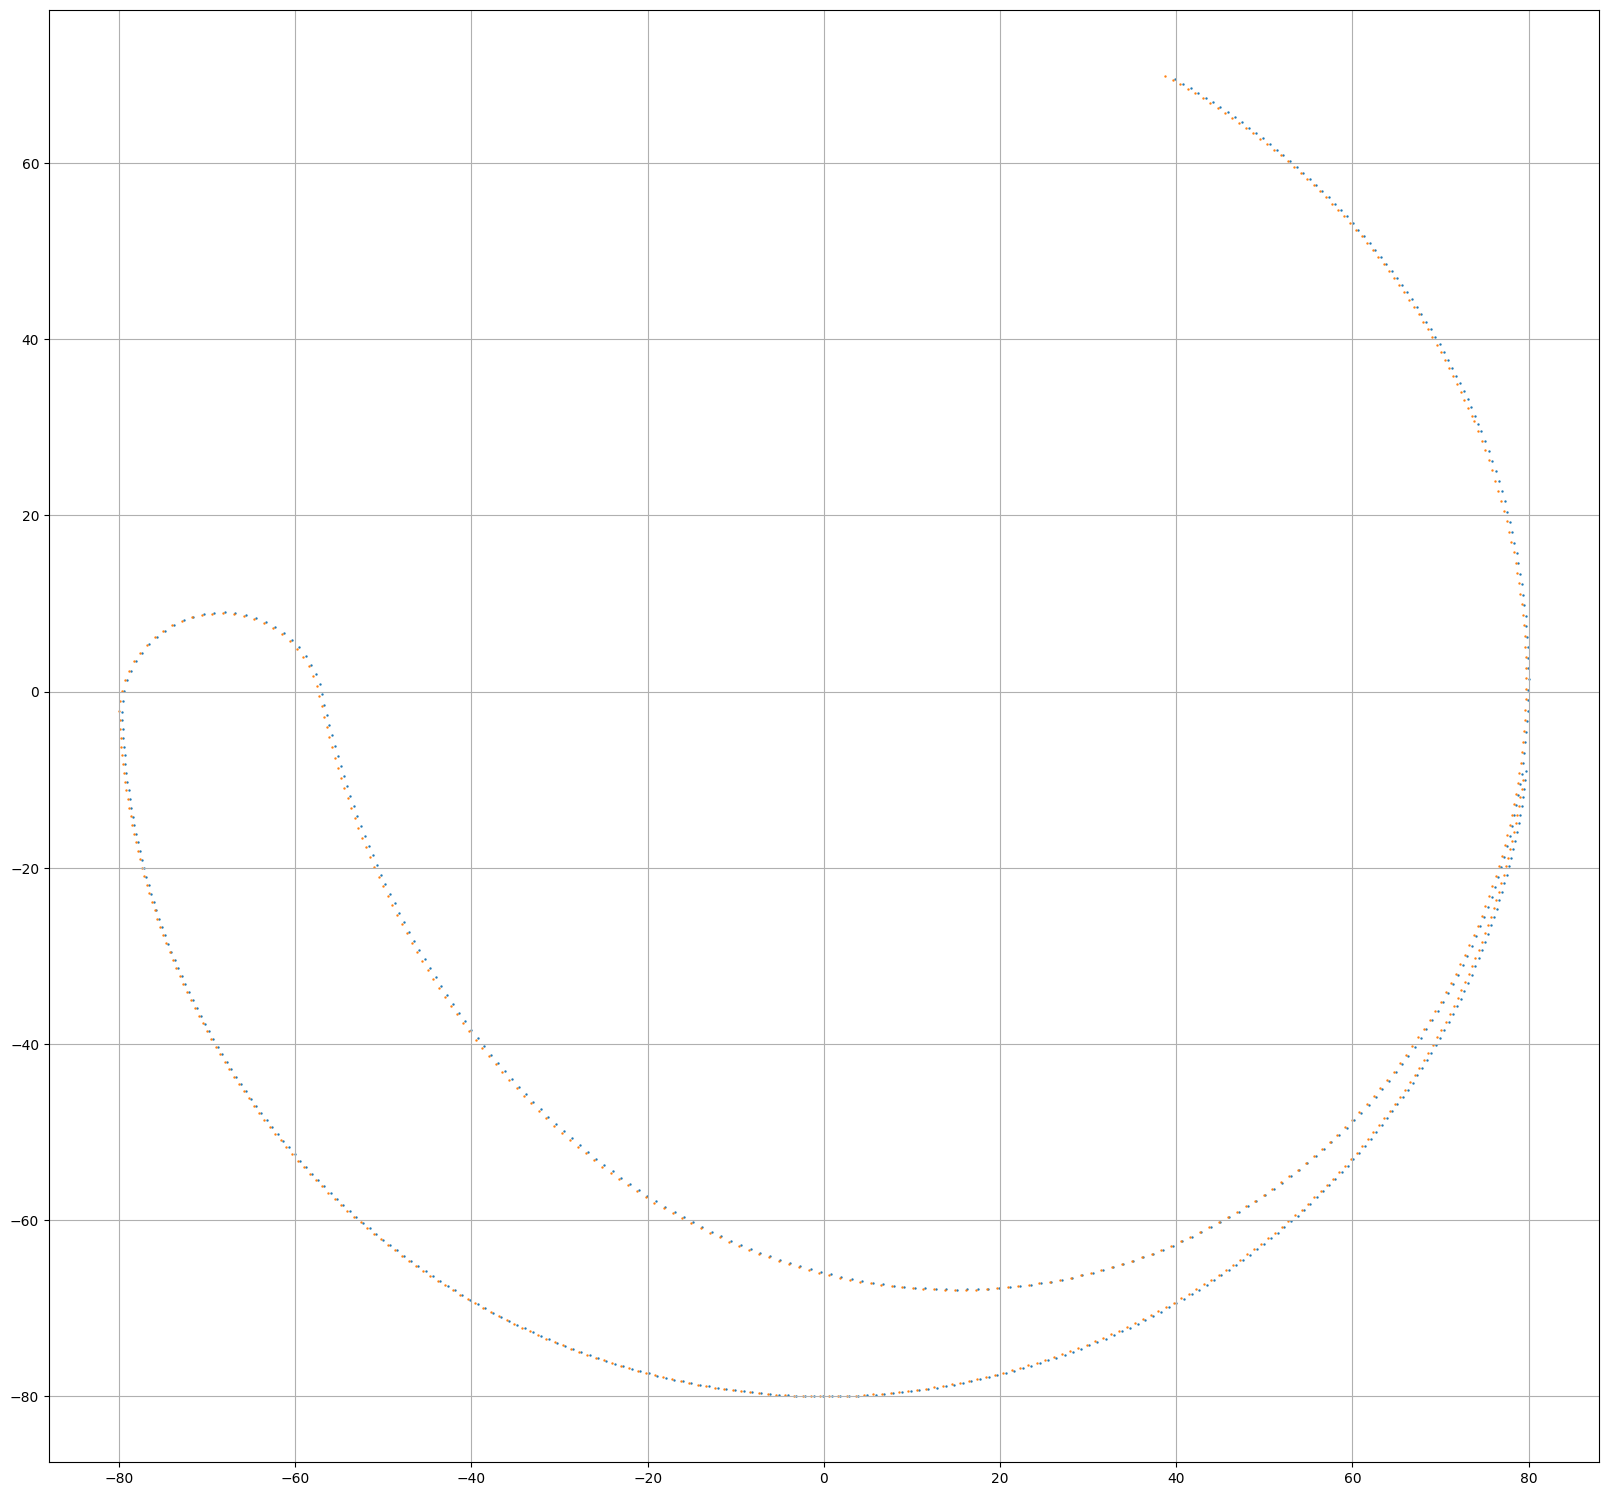

In [10]:
plt.figure(figsize=(20,20))
plt.scatter(reverse['x'], reverse['y'], s=.5)
plt.scatter(predicted['x'], predicted['y'], s=.5)
plt.gca().set_aspect('equal')
plt.grid()
plt.show()

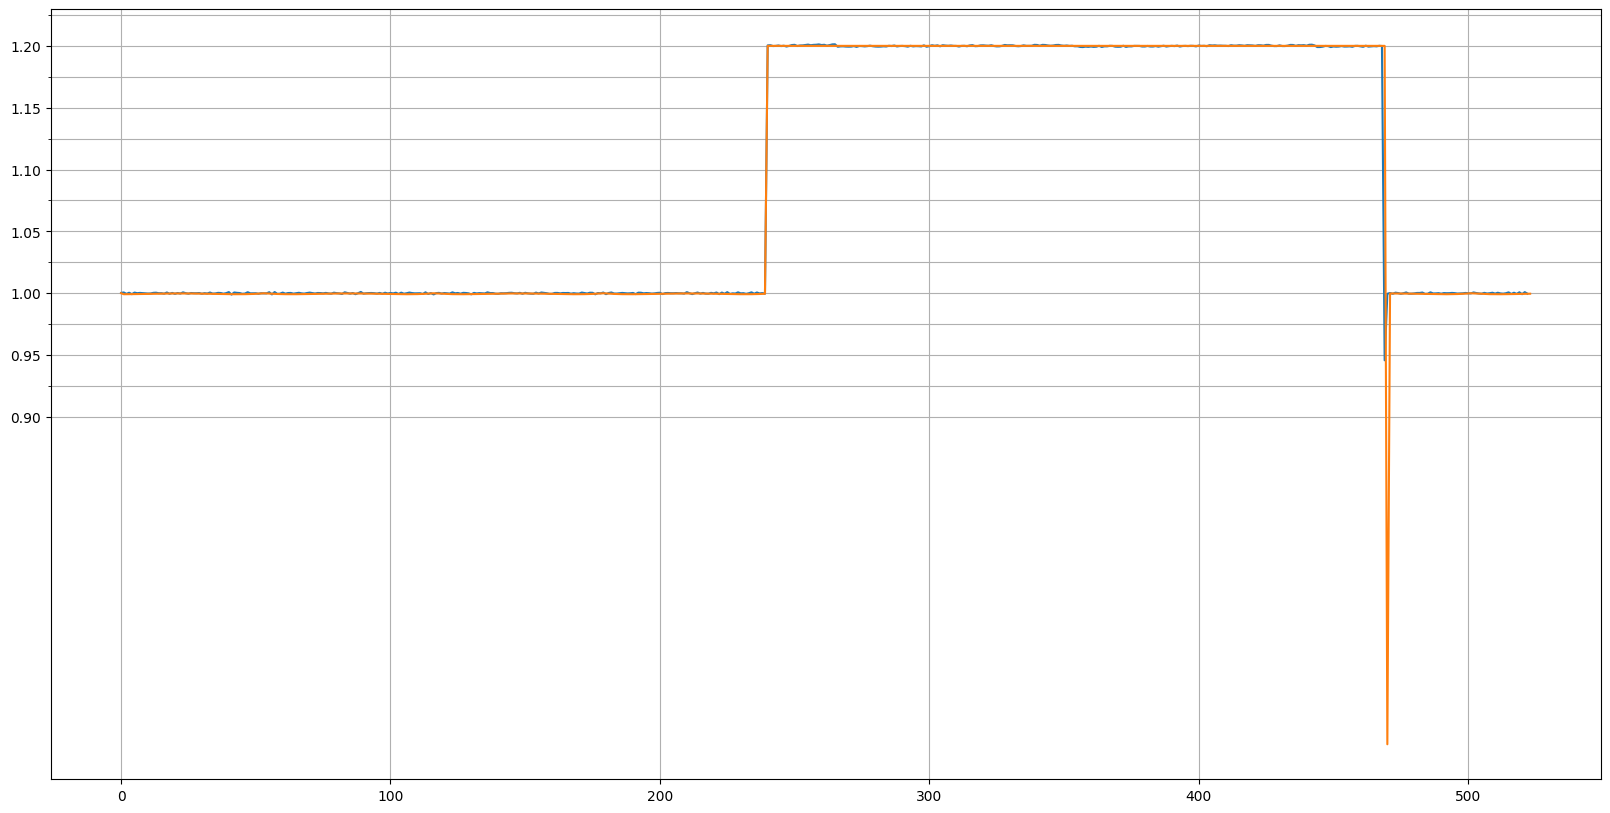

In [11]:
v = []
for i in range(reverse.shape[0]-1):
    prev = reverse.iloc[i]
    curr = reverse.iloc[i+1]
    v.append(np.sqrt((prev['x']-curr['x'])**2 + (prev['y']-curr['y'])**2))

v2 = [1] # prediction is off by one
for i in range(predicted.shape[0]-1):
    prev = predicted.iloc[i]
    curr = predicted.iloc[i+1]
    v2.append(np.sqrt((prev['x']-curr['x'])**2 + (prev['y']-curr['y'])**2))

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_yticks(np.arange(0.9, 1.5, 0.05))
ax.set_yticks(np.arange(0.9, 1.5, 0.025), minor=True)
ax.grid(visible=True, which='both')
ax.plot(v)
ax.plot(v2)